<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_11_24_SVD_MachineLearningGuide(p_396_408).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD

정방행렬, 행과 열의 크기가 다른 행렬에도 적용 가능하다

A = U * SIGMA * V^T

- 특이값 분해: U와 V에 속한 벡터는 특이벡터, 이 특이벡터는 서로 직교하는 성질. SIGMA는 대각행렬이고 행렬의 대각에 위치한 값만 0이 아니며 나머지는 다 0이다. 여기서 0이 아닌 값이 A의 특이값이다

A: M * N

U: M * M

V^T: N * N

- SIGMA의 비대각인 부분과 대각원소 중 특이값이 0인 부분을 모두 제거하고 제거된 SIGMA에 대응되는 U와 V원소도 제거해 차원을 줄인 형태로 SVD 적용한다

A: M * N

U: M * P

V^T: P * P

- Truncated SVD: SIGMA의 대각원소 중 상위 몇 개만 추출해 여기에 대응하는 U와 V의 원소도 함께 제거해 차원 줄인 형태로 분해이다

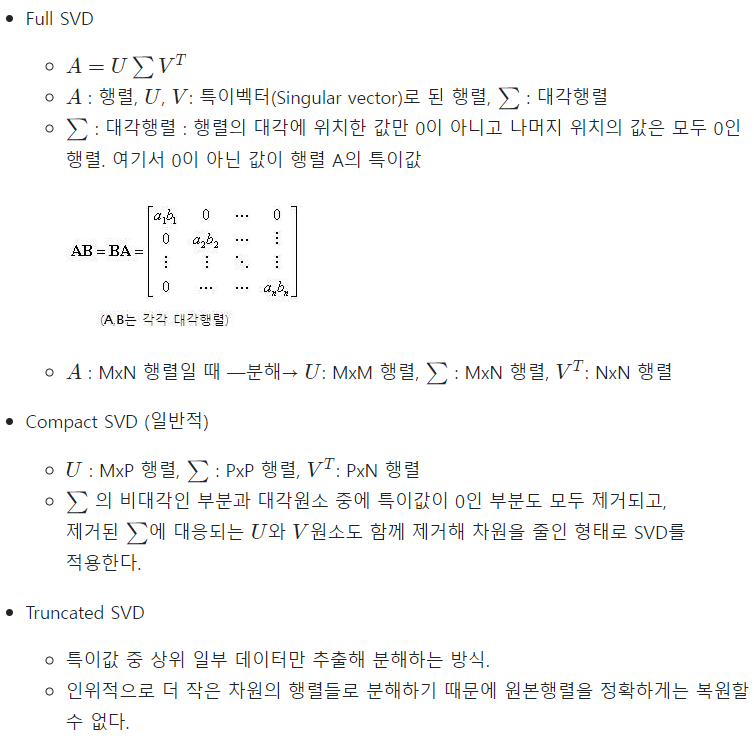

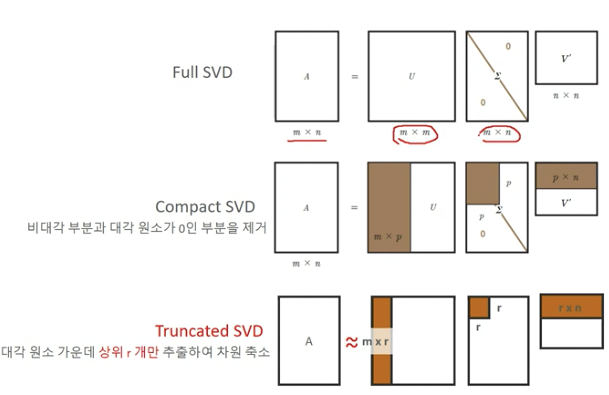

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- 원본 행렬로의 복원은 U, Sigma, Vt를 내적
- Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭 행렬로 변환 한 뒤에 내적해야 한다

In [ ]:
#Sigma 를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


dataset가 row 간 의존성이 있을 경우

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [ ]:
# 다시 SVD를 수행해 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- sigma 값 중 2개가 0으로 변한다
- 선형 독립인 로우 벡터 개수가 2개이다. 행렬의 rank= 2
- U,Sigma,Vt의 전체 데이터를 이용하지 않고 Sigma의 0에 대응하는 U, Sigma,Vt의 데이터를 제외하고 복원한다

In [ ]:
# U행렬의 경우느 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### Truncated SVD 이용하여 행렬 분해

- 대각 행렬에 있는 대각 원소, 특이값 중 상위 일부 데이터만 추출해 분해하는 방식

- 원본 행렬 정확하게 원복할 수는 없음

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\n Sigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\n Truncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape,Vt_tr.shape)
print('\n Truncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\n Truncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

 Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

 Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673

- Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨

## 사이킷런 TruncatedSVD 클래스를 이용한 변환
PCA 클래스와 유사하게 fit()와 transform() 을 호출해 원본 데이터를 몇개의 주요 컴포넌트로 차원을 축소해 변환한다

Text(0, 0.5, 'TruncatedSVD Component 2')

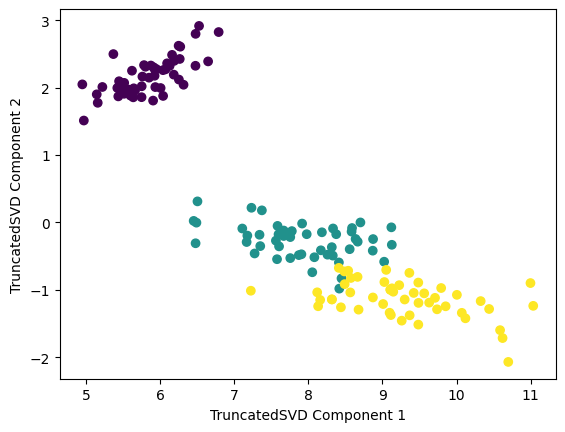

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분.
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD와 PCA 모두 SVD를 이용해 행렬 분해
- 스케일링으로 변환한 뒤 TruncatedSVD 와 PCA 클래스변환하면 두개 거의 동일

Text(0.5, 1.0, 'PCA Transformed')

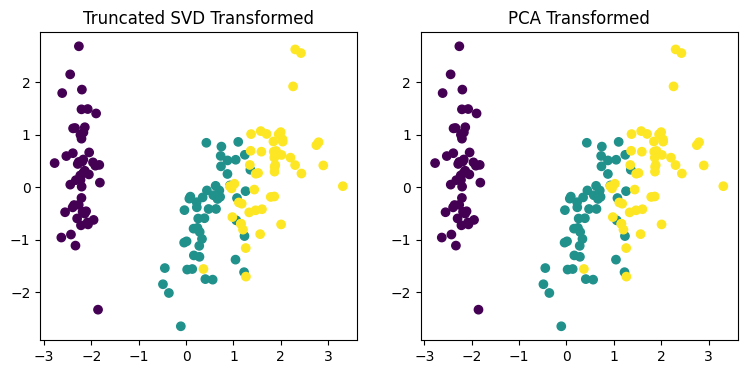

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardSclaer로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y = iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c = iris.target)
ax1.set_title("Truncated SVD Transformed")
ax2.set_title("PCA Transformed")

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())
.

2.3364990497931616e-15
2.0816681711721685e-17


- 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.
- 즉 데이터 세트가 스케일링으로 데이터 중심에 동일해지면 sklearn의 SVD와 PCA는 동일한 변환을 수행한다

# NMF(non-negative matrix factorization
- 낮은 랭크를 통한 행렬 근사 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 0이상 양수라는 것이 보장되면 두개의 기반 양수 행렬로 분해
- 길고 가는 행렬 W, 작고 넓은 행렬 H
- 분해행렬 W: 원본 행에 대해 잠재 요소의 값이 얼마나 되는지 대응
- 분해행렬 H : 잠재 요소가 원본 열로 어떻게 구성됐는지 나타내는 행렬
추천 영역에 적용

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

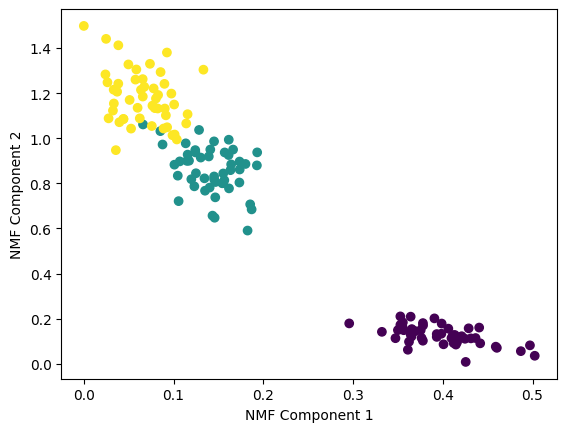

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

# 정리
- PCA : 입력 데이터의 변동성이 가장 큰 축을 구하고, 이 축에 직각인 축 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 축에 투영해 차원 축소
- LDA : 입력데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축 찾는 방식으로 차원 축소
- SVD, NMF : 많은 피처 데이터를 가진 고차원 행렬을 두개의 저차원 행렬로 분리하는 행렬 분해 기법, 잠재된 요소 추출. 추천 시스템에 활용